# Insurance Claim Fraud Detection

# Data collection

In [1]:
#importing the basic library
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing the data and printing the first 10 rows of the data
df=pd.read_csv('data.csv')
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [3]:
#displaying the bottom 10 rows of the dataset
df.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
990,286,43,663190,05-02-1994,IL,100/300,500,1564.43,3000000,477644,FEMALE,MD,prof-specialty,movies,unmarried,77500,-32800,31-01-2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NY,Northbrook,4755 1st St,18,1,?,2,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N,NaN
991,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,MALE,MD,other-service,basketball,other-relative,59400,-32200,06-02-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,WV,Riverwood,5312 Francis Ridge,21,1,NO,0,1,NO,46980,0,5220,41760,Accura,TL,2002,N,NaN
992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,MALE,MD,exec-managerial,camping,husband,50300,0,23-01-2015,Multi-vehicle Collision,Front Collision,Major Damage,Fire,OH,Springfield,1705 Weaver St,6,3,YES,1,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N,NaN
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,MALE,MD,exec-managerial,camping,husband,0,-32100,17-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,1643 Washington Hwy,20,3,?,0,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,MALE,High School,sales,bungie-jumping,own-child,0,-82100,22-01-2015,Parked Car,?,Minor Damage,None,SC,Northbend,6516 Solo Drive,6,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In this data we can see that the Dependent variable "fraud_reported" is Categorical Nominal type,

So we can say its a classification(Logistic regression) problem.

In [4]:
#displaying the column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

We can see that there is one dependent variable 'fraud_reported' with all other as independent variable

In [5]:
#displaying the number of columns and number of rows
df.shape

(1000, 40)

In [6]:
#checking the data type of all varialbe
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#checking the data type of all varialbe
data_type=df.dtypes
data_type

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
#counting the number of data type present
data_type.value_counts()

object     21
int64      17
float64     2
dtype: int64

In [9]:
#displaying the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
#displaying the maximum and minimum and the total unique element in Numerical column
for i in df.columns:
  if df[i].dtype != 'object':
    print(f"===== column: {i} =====")
    print("MAX : ",df[i].max())
    print('MIN : ',df[i].min())
    print('Number of unique values : ',df[i].nunique())
    print('\n\n\n')

===== column: months_as_customer =====
MAX :  479
MIN :  0
Number of unique values :  391




===== column: age =====
MAX :  64
MIN :  19
Number of unique values :  46




===== column: policy_number =====
MAX :  999435
MIN :  100804
Number of unique values :  1000




===== column: policy_deductable =====
MAX :  2000
MIN :  500
Number of unique values :  3




===== column: policy_annual_premium =====
MAX :  2047.59
MIN :  433.33
Number of unique values :  991




===== column: umbrella_limit =====
MAX :  10000000
MIN :  -1000000
Number of unique values :  11




===== column: insured_zip =====
MAX :  620962
MIN :  430104
Number of unique values :  995




===== column: capital-gains =====
MAX :  100500
MIN :  0
Number of unique values :  338




===== column: capital-loss =====
MAX :  0
MIN :  -111100
Number of unique values :  354




===== column: incident_hour_of_the_day =====
MAX :  23
MIN :  0
Number of unique values :  24




===== column: number_of_vehicles_involved =====
MAX 

In [11]:
#checking the count of unique value in categorical column
for i in df.columns:
  if df[i].dtype == 'object':
    print(f"===== column: {i} =====")
    print('Number of unique values : ',df[i].nunique())
    print('Unique element and their frequency : \n',df[i].value_counts())
    print('\n\n\n')

===== column: policy_bind_date =====
Number of unique values :  951
Unique element and their frequency : 
 28-04-1992    3
05-08-1992    3
01-01-2006    3
11-03-2010    2
14-07-1997    2
             ..
03-08-2010    1
06-11-2013    1
01-03-2012    1
26-06-2000    1
30-03-1999    1
Name: policy_bind_date, Length: 951, dtype: int64




===== column: policy_state =====
Number of unique values :  3
Unique element and their frequency : 
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64




===== column: policy_csl =====
Number of unique values :  3
Unique element and their frequency : 
 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64




===== column: insured_sex =====
Number of unique values :  2
Unique element and their frequency : 
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64




===== column: insured_education_level =====
Number of unique values :  7
Unique element and their frequency : 
 JD             161
High School    160

In [12]:
#looking at statistical information of Numerical type of data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [13]:
#looking at the statistical information of categorical type of data set
df.describe(include='object').T

,count,unique,top,freq
policy_bind_date,1000,951,28-04-1992,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,02-02-2015,28
incident_type,1000,4,Multi-vehicle Collision,419


In [14]:
#replacin the '?' by nan value
df=df.replace('?',np.nan)

In [15]:
#droping the column '_c39' 
df.drop('_c39',axis=1,inplace=True)

In [16]:
num_col=[]
cat_col=[]
for i in df.columns:
  if df[i].dtype != 'object':
    num_col.append(i)
  else:
    cat_col.append(i)
print('Numerical column :',num_col)
print('Categorical column :',cat_col)

Numerical column : ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
Categorical column : ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


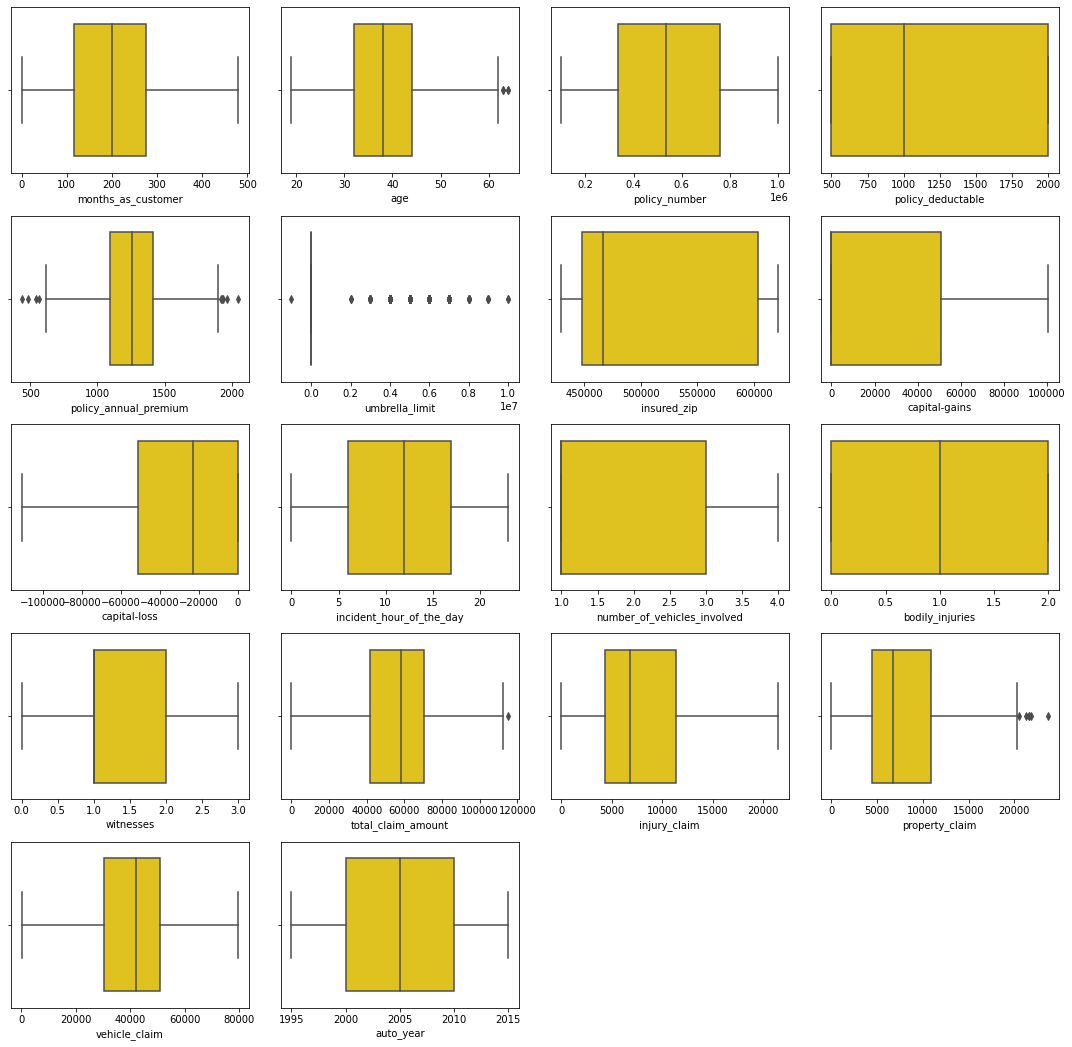

In [17]:
#plotting box curve for numerical column
plt.figure(figsize=(15,20))
for i,col in enumerate(num_col):
  plt.subplot(7,4,i+1)
  sn.boxplot(df[col],color='gold')
  plt.tight_layout()

We can see that some outlier is pesent 

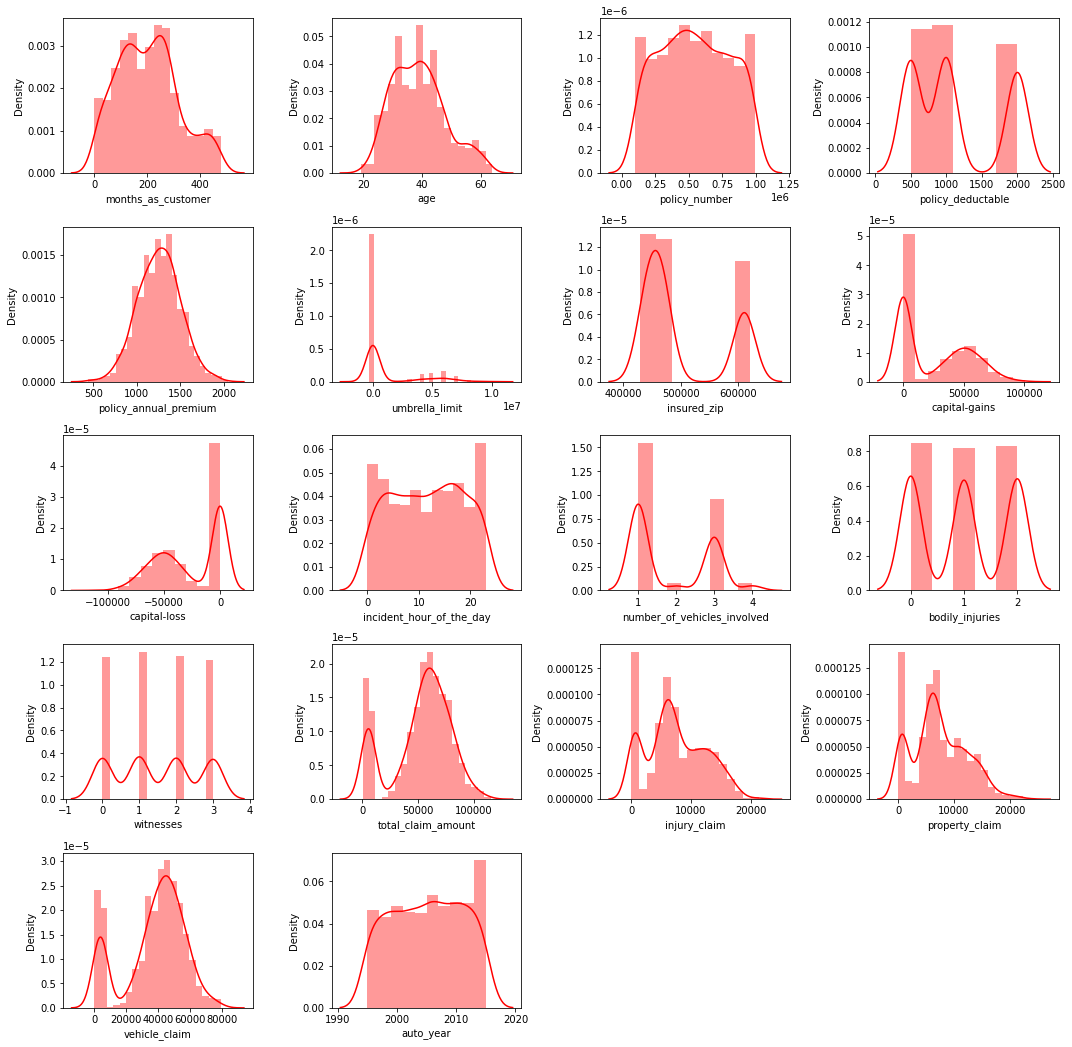

In [18]:
#plotting distribution curve for numerical column
plt.figure(figsize=(15,20))
for i,col in enumerate(num_col):
  plt.subplot(7,4,i+1)
  sn.distplot(df[col],color='red')
  plt.tight_layout()

Skewness has to be treated before handiling

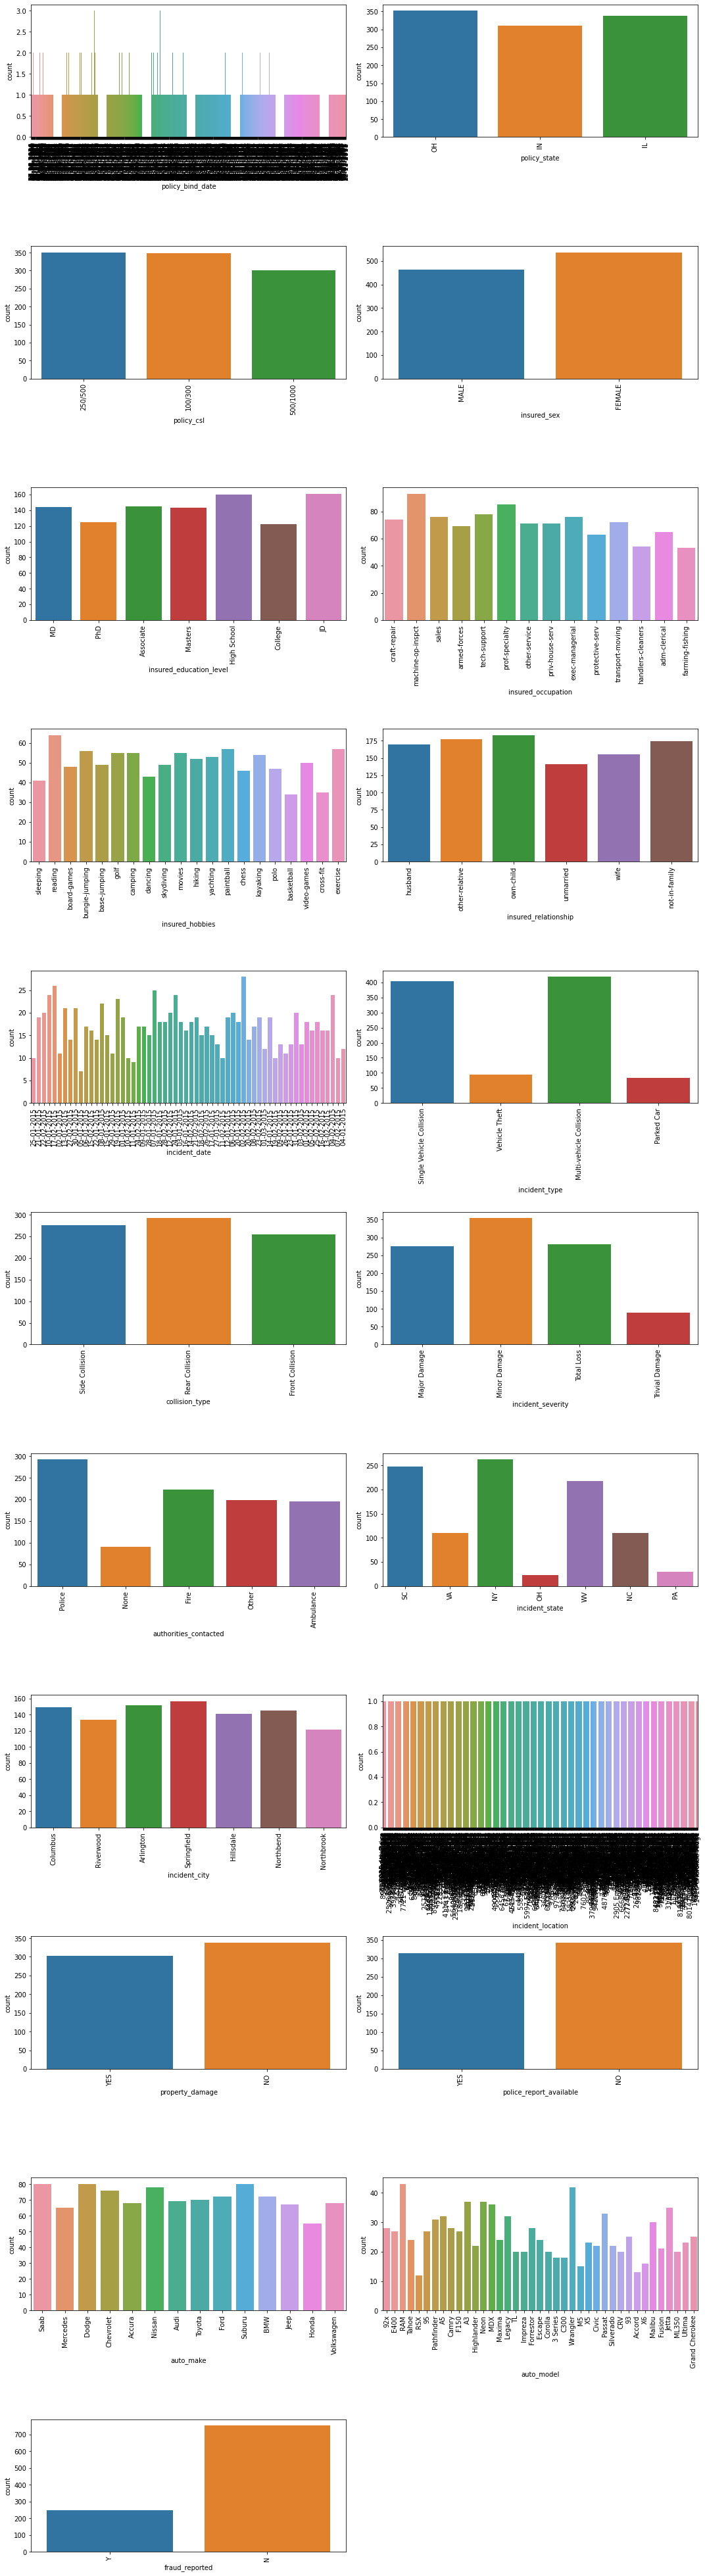

In [19]:
#plotting count plot for catogorical variable
plt.figure(figsize=(15,100))
for i,col in enumerate(cat_col):
  plt.subplot(20,2,i+1)
  sn.countplot(df[col],data=df)
  plt.xticks(rotation=90)
  plt.tight_layout()

We can see that the class imbalance is present in our data set 

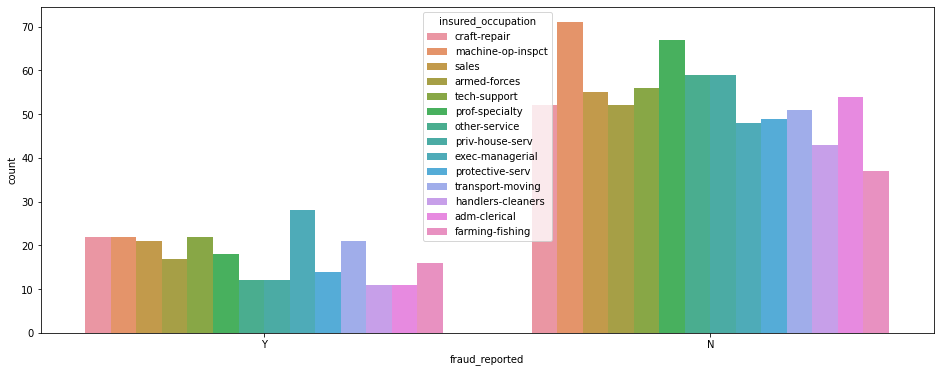

In [20]:
plt.figure(figsize=[16,6])
sn.countplot(x=df['fraud_reported'],hue=df['insured_occupation'],data=df);

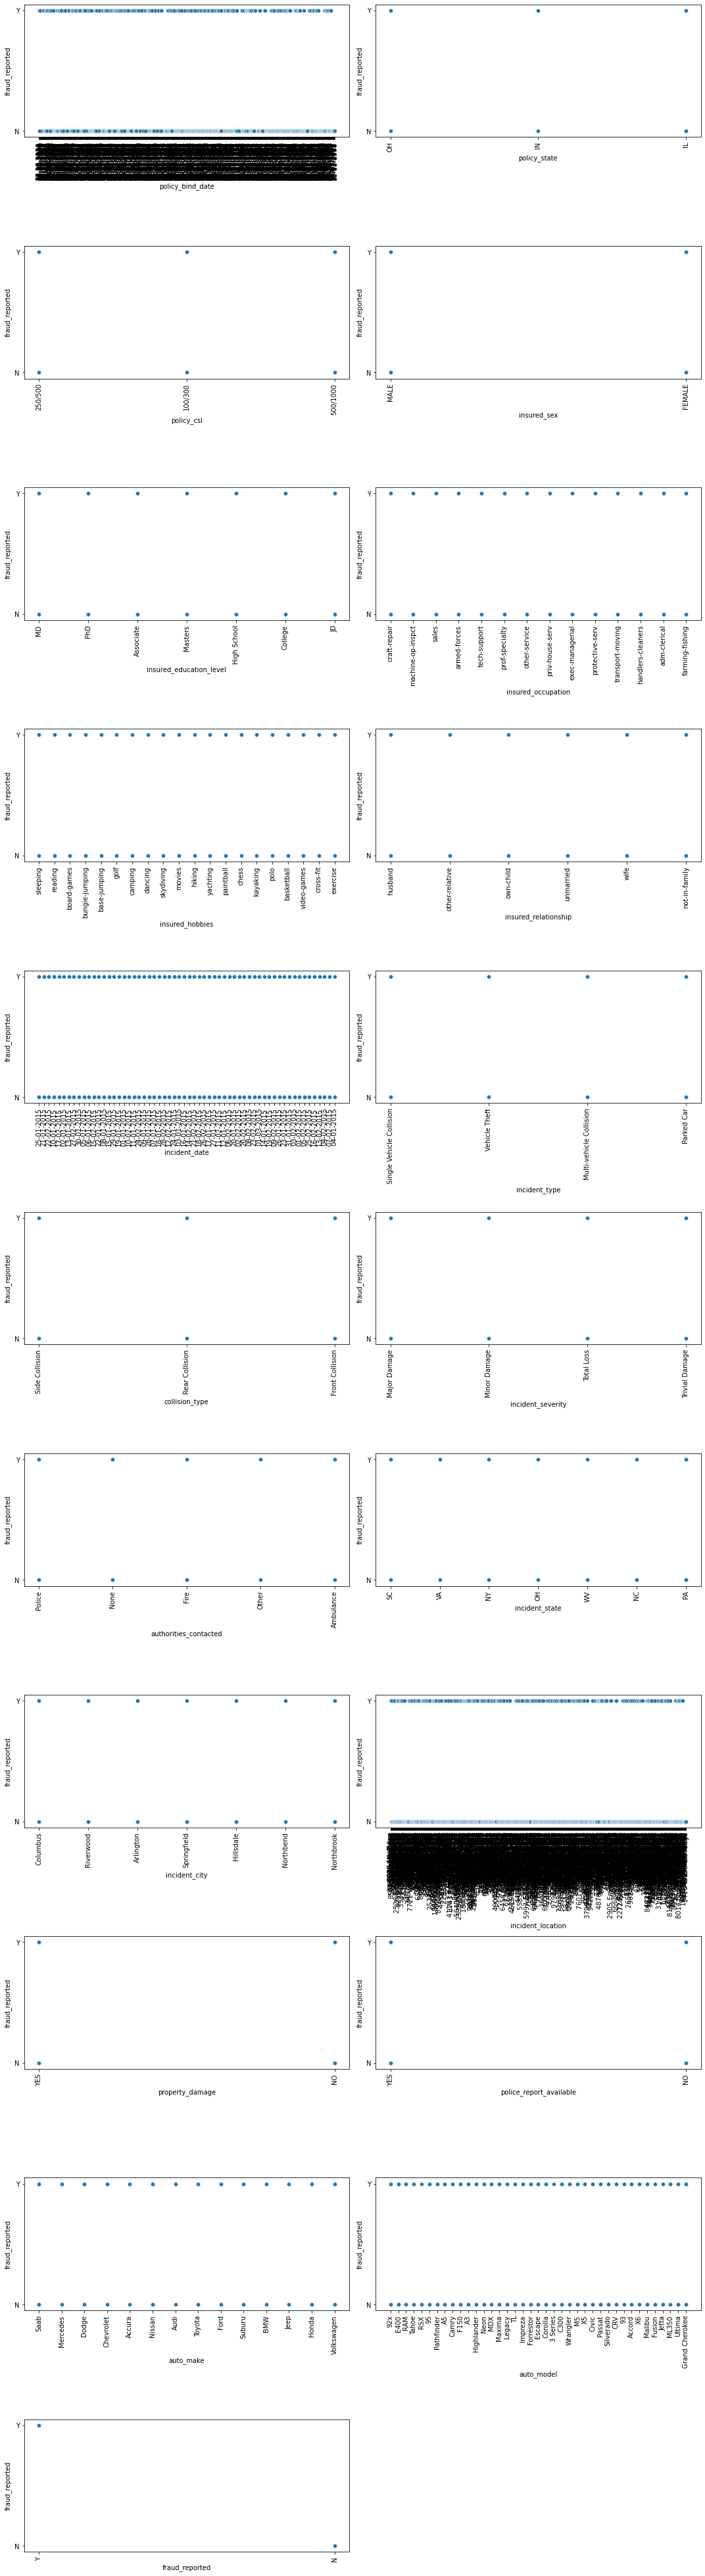

In [21]:
#plotting the scatter plot categorical value with dependent variable
plt.figure(figsize=(15,100))
for i,col in enumerate(cat_col):
  plt.subplot(20,2,i+1)
  sn.scatterplot(x=col,y='fraud_reported',data=df)
  plt.xticks(rotation=90)
  plt.tight_layout()

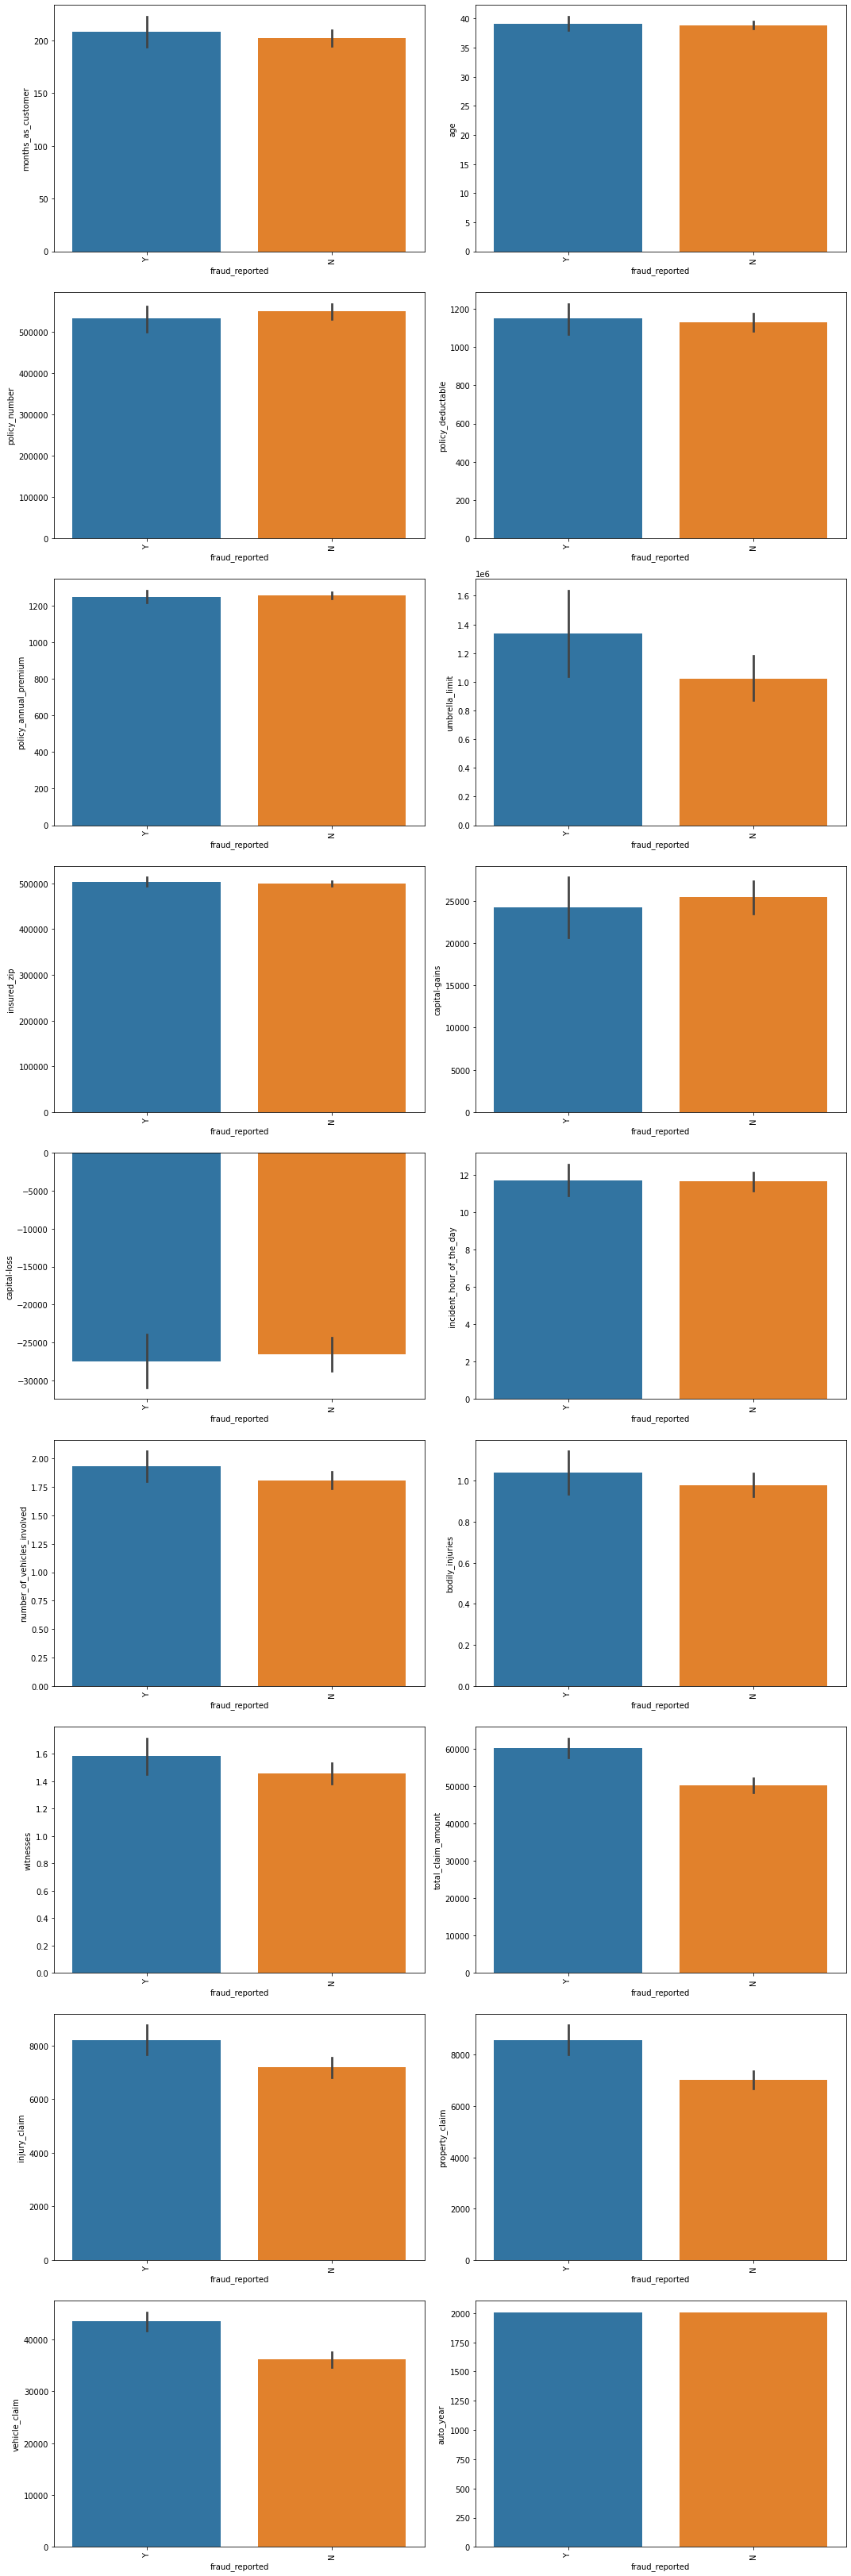

In [22]:
#plotting the bar plot with the dependent variable
plt.figure(figsize=(15,100))
for i,col in enumerate(num_col):
  plt.subplot(20,2,i+1)
  sn.barplot(y=col,x='fraud_reported',data=df)
  plt.xticks(rotation=90)
  plt.tight_layout()

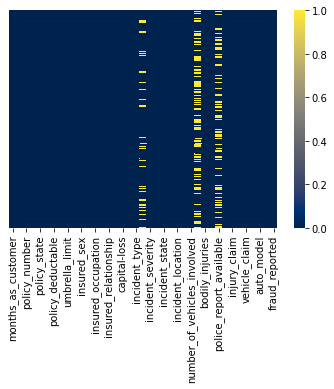

In [23]:
#ploting heat map to see wheather null value is present or not
sn.heatmap(df.isnull(),yticklabels=False,cmap='cividis');

In [24]:
#displaying the column with nun values
df[df.isna().any(axis=1)]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,NaN,0,0,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,NaN,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NaN,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NaN,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [25]:
#seeing correlation of each parameter with label column
dfcor=df.corr()
dfcor

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


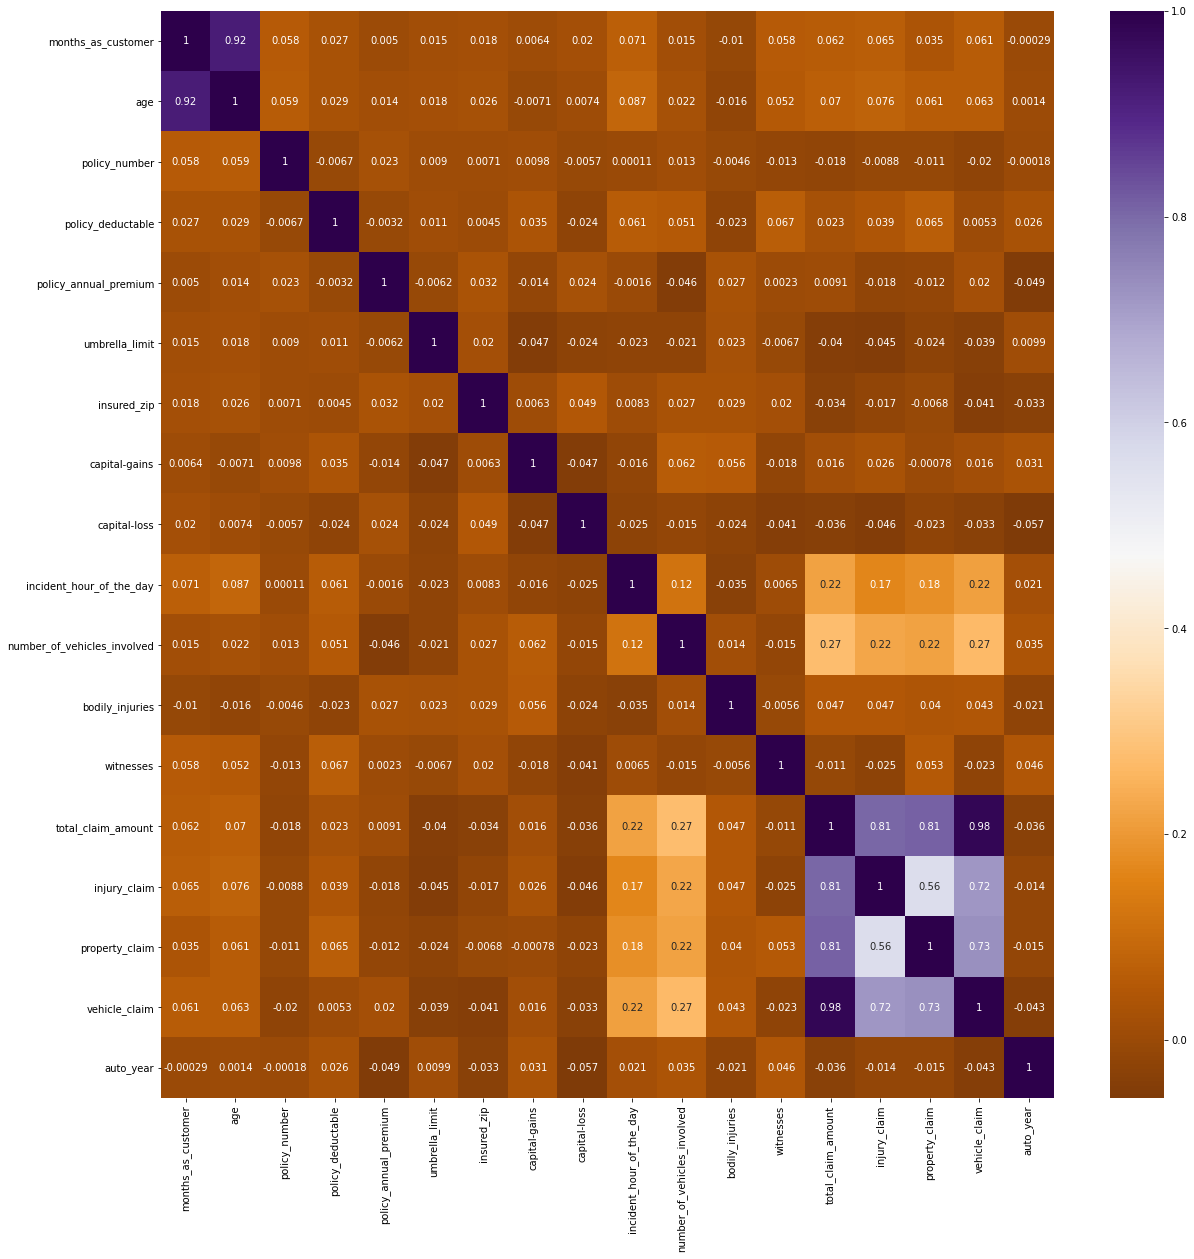

In [26]:
plt.figure(figsize=(20,20))
sn.heatmap(dfcor,annot=True,cmap='PuOr')

In [27]:
#checking the null value
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [28]:
#Filling the null values by 'Unknow'
df['collision_type'].fillna('Unknown Collision',inplace=True)
df['property_damage'].fillna('Unknow',inplace=True)
df['police_report_available'].fillna('Unknow',inplace=True)

In [29]:
#Droping the unwanted columns
df.drop(['policy_number','policy_bind_date','policy_csl','insured_hobbies','insured_zip','incident_date','total_claim_amount'],axis=1,inplace=True)

In [31]:
#applying the LabelEncoder on categorical data type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i]=le.fit_transform(df[i])

In [32]:
#copying our data set 
dff=df.copy()

In [33]:
#checking wheather we can remove outlier by z score method or not
from scipy.stats import zscore
z=np.abs(zscore(dff))
dff=dff[(z<3).all(axis=1)]
print("Before removing outliers::",df.shape)
print("After removing outliers::",dff.shape)
p=100-(len(dff.index)/len(df.index)*100)
print(f'We are lossing {p} % of data.')

Before removing outliers:: (1000, 32)
After removing outliers:: (980, 32)
We are lossing 2.0 % of data.


We are loosin only 2% so we can remove outlier

In [34]:
#Creating the dependent and independent variable 
x=dff.drop(['fraud_reported'],axis=1)
y=dff[['fraud_reported']]

In [35]:
#removing skewness by power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [36]:
#applying standard scaling method on X variable 
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [37]:
#import library for model building
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [38]:
#applying over sampling on X and Y parameters 
from imblearn.over_sampling import SMOTE
ovs=SMOTE()
x_over,y_over=ovs.fit_resample(x,y)
print(x_over.shape)
print(y_over.shape,'\n')

(1480, 31)
(1480,) 



# Model building

In [39]:
#selecting best random state
from sklearn.tree import DecisionTreeClassifier
maxA=0
maxR=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxA:
        maxA=acc
        maxR=i
print('Best accuracy is ',maxA,' on random state ',maxR)

Best accuracy is  0.8378378378378378  on random state  77


In [40]:
#building model using the Random Forest, Decision Tree classifier, SVC, Logistic Regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [41]:
#spliting the data set into train and test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=77)

In [42]:
#Model building
model={RandomForestClassifier():"RandomForestClassifier", DecisionTreeClassifier():'DecisionTreeClassifier', SVC():'SVC', 
       LogisticRegression():'LogisticRegression'}
accscore=[]
crossvalidation=[]
for key in model:
  print("===== ",model.get(key),' model ===== ')
  key.fit(x_train,y_train)
  pred=key.predict(x_test)
  accs=accuracy_score(y_test,pred)
  print("Accuracy Score is ",accs,'\n')
  accscore.append(accs)
  cm=confusion_matrix(y_test,pred)
  print('confusion Matrix \n',cm,'\n')
  cr=classification_report(y_test,pred)
  print('Classification Report',cr)

  c=cross_val_score(key,x_over,y_over,cv=5)
  print('Cross validation score is',(np.abs(c)).mean(),'\n')
  crossvalidation.append((np.abs(c)).mean())
  print('\n\n\n')

=====  RandomForestClassifier  model ===== 
Accuracy Score is  0.8837837837837837 

confusion Matrix 
 [[171  26]
 [ 17 156]] 

Classification Report               precision    recall  f1-score   support

           0       0.91      0.87      0.89       197
           1       0.86      0.90      0.88       173

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.89      0.88      0.88       370

Cross validation score is 0.8695945945945945 





=====  DecisionTreeClassifier  model ===== 
Accuracy Score is  0.8216216216216217 

confusion Matrix 
 [[155  42]
 [ 24 149]] 

Classification Report               precision    recall  f1-score   support

           0       0.87      0.79      0.82       197
           1       0.78      0.86      0.82       173

    accuracy                           0.82       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.83      0.82      0.82       

In [43]:
#selecting the best model from the above model
Modelselection=pd.DataFrame({})
Modelselection['Model_Name']=['RandomForestClassifier','DecisionTreeClassifier', 'SVC','LogisticRegression']
Modelselection['Accuracy Score']=accscore
Modelselection['Cross Validation']=crossvalidation
Modelselection['Diff of Acc_Score and Cross_Val']=abs(Modelselection['Accuracy Score']-Modelselection['Cross Validation'])
Modelselection

,Model_Name,Accuracy Score,Cross Validation,Diff of Acc_Score and Cross_Val
0,RandomForestClassifier,0.883784,0.869595,0.014189
1,DecisionTreeClassifier,0.821622,0.773649,0.047973
2,SVC,0.843243,0.843919,0.000676
3,LogisticRegression,0.770270,0.764865,0.005405


we have got RandomForestClassifier with 88% of accuracy so lets do hyper parameter tuning on that

In [44]:
#Hyper parameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

p1={'max_features':['auto','sqrt'],'criterion': ['gini','entropy'],'max_depth':np.arange(2,20)}
p2={'oob_score':['True'],'class_weight':['balanced','balanced_subsample'],'max_leaf_nodes':np.arange(1,30,5)}
p=[p1,p2]
for i in p:
  r_f=RandomForestClassifier()
  clf=GridSearchCV(r_f,i)
  clf.fit(x_train,y_train)
  print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt'}
{'class_weight': 'balanced', 'max_leaf_nodes': 26, 'oob_score': 'True'}


In [45]:
#tuning using 1st set best parameter
model_1=RandomForestClassifier(criterion='entropy', max_depth=18, max_features='sqrt')
model_1.fit(x_train,y_train)
pred=model_1.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(model_1,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean(),'\n')

Accuracy Score is  0.8837837837837837 

confusion Matrix 
 [[170  27]
 [ 16 157]] 

Classification Report               precision    recall  f1-score   support

           0       0.91      0.86      0.89       197
           1       0.85      0.91      0.88       173

    accuracy                           0.88       370
   macro avg       0.88      0.89      0.88       370
weighted avg       0.89      0.88      0.88       370

Cross validation score is 0.8695945945945945 



In [46]:
#tuning using 2st set best parameter
model_2=RandomForestClassifier(class_weight='balanced', max_leaf_nodes=26, oob_score=True)
model_2.fit(x_train,y_train)
pred=model_2.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(model_2,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean(),'\n')

Accuracy Score is  0.8405405405405405 

confusion Matrix 
 [[167  30]
 [ 29 144]] 

Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       197
           1       0.83      0.83      0.83       173

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370

Cross validation score is 0.8331081081081082 



In [47]:
#tuning using 2st set best parameter
fin=RandomForestClassifier()
fin.fit(x_train,y_train)
pred=fin.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(fin,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean(),'\n')

Accuracy Score is  0.8810810810810811 

confusion Matrix 
 [[173  24]
 [ 20 153]] 

Classification Report               precision    recall  f1-score   support

           0       0.90      0.88      0.89       197
           1       0.86      0.88      0.87       173

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370

Cross validation score is 0.8736486486486486 



We have got our final modle with **88%** percent accuracy with 1% deviation 

In [48]:
#plotting roc_auc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=model_1.predict_proba(x_test)[:,1]
frp,tpr,thresholds=roc_curve(y_test,y_pred_prob)

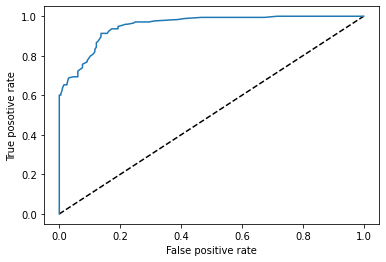

auc_score :  0.8852293066518002


In [49]:
plt.plot([0,1],[0,1],'k--')
plt.plot(frp,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.show()
auc_score=roc_auc_score(y_test,model_1.predict(x_test))
print('auc_score : ',auc_score)

# Saving the model

In [50]:
#saving the model
import joblib
joblib.dump(model_1,'FinalModel.pk1')

['FinalModel.pk1']